# Automated detection of pollen-bearning Bees Using Convolution Neural Network

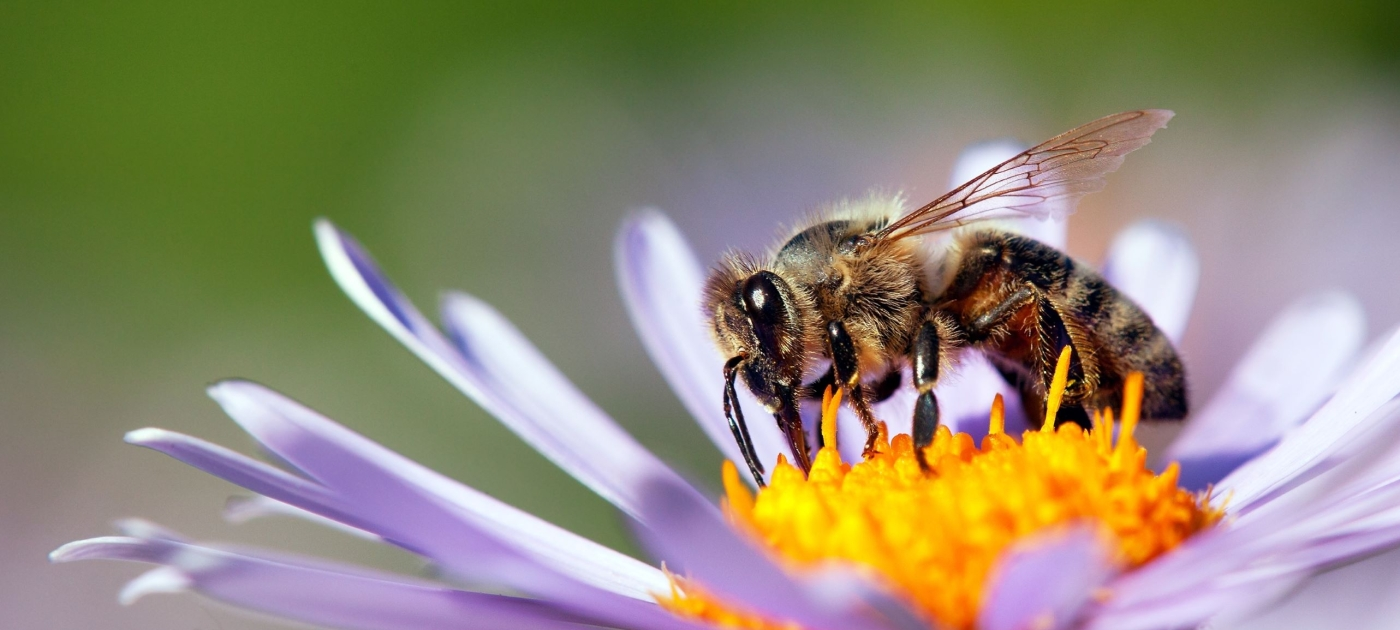

# Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import time

from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Add
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Activation, MaxPool2D
from tensorflow.keras.models import Model, Sequential

In [2]:
df = pd.read_csv(r'C:\Users\pratik\Downloads\Feynn_Assingment_1\PollenDataset\pollen_data.csv', usecols=['filename', 'pollen_carrying'])

In [3]:
df.head()

,filename,pollen_carrying
0,P10057-125r.jpg,1
1,P57380-120r.jpg,1
2,NP63671-221r.jpg,0
3,NP53776-47r.jpg,0
4,NP13382-201r.jpg,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   filename         714 non-null    object
 1   pollen_carrying  714 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.3+ KB


# Pre-Processing

In [5]:
def preprocess_df(df, image_path):
    df = df.copy()
    
    # Change filenames into filepaths
    df['filename'] = df['filename'].apply(lambda x: image_path / Path(x)).astype(str)
    
    # Create text labels for the images
    df['pollen_carrying'] = df['pollen_carrying'].replace({0: "NO POLLEN", 1: "POLLEN"})
    
    # Train-test split
    train_df, test_df = train_test_split(df, train_size=0.7, shuffle=True, random_state=1)
    
    return train_df, test_df

In [6]:
train_df, test_df = preprocess_df(df, image_path='C:\\Users\\pratik\\Downloads\\Feynn_Assingment_1\\PollenDataset\\images')

In [7]:
train_df.head(10)

,filename,pollen_carrying
507,C:\Users\pratik\Downloads\Feynn_Assingment_1\P...,POLLEN
346,C:\Users\pratik\Downloads\Feynn_Assingment_1\P...,NO POLLEN
160,C:\Users\pratik\Downloads\Feynn_Assingment_1\P...,POLLEN
463,C:\Users\pratik\Downloads\Feynn_Assingment_1\P...,NO POLLEN
432,C:\Users\pratik\Downloads\Feynn_Assingment_1\P...,POLLEN
301,C:\Users\pratik\Downloads\Feynn_Assingment_1\P...,POLLEN
592,C:\Users\pratik\Downloads\Feynn_Assingment_1\P...,NO POLLEN
103,C:\Users\pratik\Downloads\Feynn_Assingment_1\P...,NO POLLEN
455,C:\Users\pratik\Downloads\Feynn_Assingment_1\P...,NO POLLEN
146,C:\Users\pratik\Downloads\Feynn_Assingment_1\P...,POLLEN


In [8]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [9]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='pollen_carrying',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='pollen_carrying',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='filename',
    y_col='pollen_carrying',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

Found 400 validated image filenames belonging to 2 classes.
Found 99 validated image filenames belonging to 2 classes.
Found 215 validated image filenames belonging to 2 classes.


In [10]:
AlexNet = Sequential()
AlexNet.add(Input(shape=(224, 224, 3)))
    
AlexNet.add(Conv2D(filters=96, kernel_size=(3,3), strides=4))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPool2D(pool_size=3, strides=2))

AlexNet.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPool2D(pool_size=3, strides=2))

AlexNet.add(Conv2D(filters=384, kernel_size=(3, 3), padding='same'))
AlexNet.add(Activation('relu'))

AlexNet.add(Conv2D(filters=384, kernel_size=(3, 3), padding='same'))
AlexNet.add(Activation('relu'))

AlexNet.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same'))
AlexNet.add(Activation('relu'))

AlexNet.add(MaxPool2D(pool_size=3, strides=2))
  
AlexNet.add(Flatten())

AlexNet.add(Dense(units=4096))
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0.5, seed=73))
    
AlexNet.add(Dense(units=4096))
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0.7, seed=73))

AlexNet.add(Dense(1, activation='sigmoid'))

In [11]:
AlexNet.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [12]:
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 96)        2688      
                                                                 
 activation (Activation)     (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       221440    
                                                                 
 activation_1 (Activation)   (None, 27, 27, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                    

# Training

In [13]:
start_time = time.time()
history = AlexNet.fit(train_images,epochs=30,validation_data= val_images)
training_time = time.time() - start_time

Epoch 1/30
13/13 [==============================] - 26s 2s/step - loss: 0.8270 - accuracy: 0.5100 - val_loss: 0.7081 - val_accuracy: 0.4545
Epoch 2/30
13/13 [==============================] - 27s 2s/step - loss: 0.6914 - accuracy: 0.5300 - val_loss: 0.6943 - val_accuracy: 0.4545
Epoch 3/30
13/13 [==============================] - 25s 2s/step - loss: 0.6287 - accuracy: 0.6475 - val_loss: 0.3308 - val_accuracy: 0.8687
Epoch 4/30
13/13 [==============================] - 21s 2s/step - loss: 0.4390 - accuracy: 0.8375 - val_loss: 0.3913 - val_accuracy: 0.8384
Epoch 5/30
13/13 [==============================] - 20s 2s/step - loss: 0.2910 - accuracy: 0.9025 - val_loss: 0.1666 - val_accuracy: 0.9495
Epoch 6/30
13/13 [==============================] - 26s 2s/step - loss: 0.2520 - accuracy: 0.9150 - val_loss: 0.1989 - val_accuracy: 0.9394
Epoch 7/30
13/13 [==============================] - 20s 2s/step - loss: 0.2103 - accuracy: 0.9300 - val_loss: 0.1182 - val_accuracy: 0.9697
Epoch 8/30
13/13 [==

In [14]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Accuracy and Loss Plot

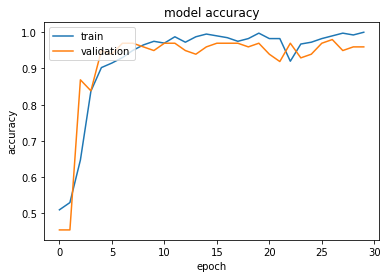

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

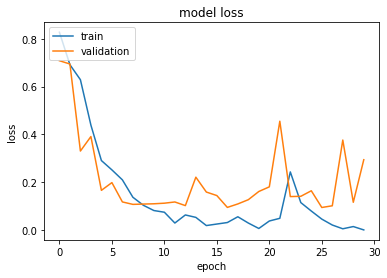

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

In [20]:
import warnings
warnings.filterwarnings("ignore")

# Testing

In [22]:
results = AlexNet.evaluate(test_images, verbose=0)
print("Accuracy: {:.2f}%".format(results[1] * 100))

Accuracy: 93.95%


Accuracy: 93.95%


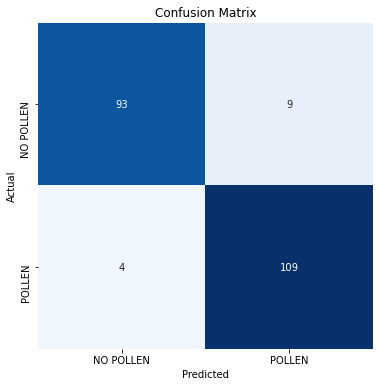

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
predictions = np.squeeze(AlexNet.predict(test_images) >= 0.5).astype(np.int)

cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1])
clr = classification_report(test_images.labels, predictions, labels=[0, 1], target_names=["NO POLLEN", "POLLEN"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["NO POLLEN", "POLLEN"])
plt.yticks(ticks=[0.5, 1.5], labels=["NO POLLEN", "POLLEN"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [18]:
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

   NO POLLEN       0.96      0.91      0.93       102
      POLLEN       0.92      0.96      0.94       113

    accuracy                           0.94       215
   macro avg       0.94      0.94      0.94       215
weighted avg       0.94      0.94      0.94       215



# Predicition

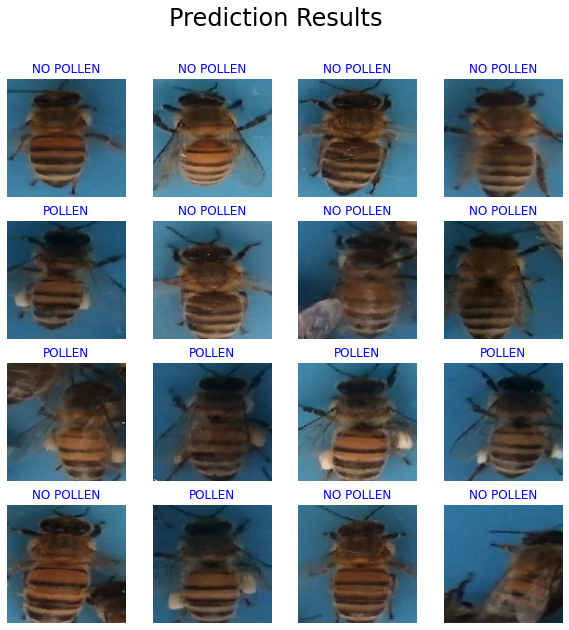

In [19]:
plt.figure(figsize=(10, 10))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(test_images[0][0][i])
    plt.title(
        "NO POLLEN" if predictions[i] == 0 else "POLLEN",
        color='blue' if predictions[i] == test_images.labels[i] else 'red'
    )
    plt.axis('off')

plt.suptitle("Prediction Results", size=24)
plt.show()